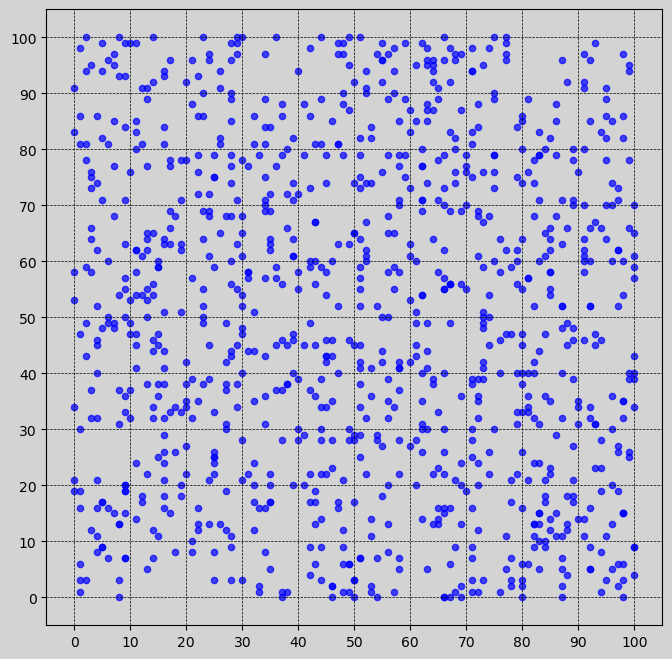

In [1]:

import matplotlib.pyplot as plt
import numpy as np

def plot_points(x, y, dot_size=10, grid_size=10, highlight=None):
    
    fig, ax = plt.subplots(figsize=(8, 8))
    fig.patch.set_facecolor('lightgray')
    ax.set_facecolor('lightgray')
    
    # Plot the points
    ax.scatter(x, y, s=dot_size, color='blue', alpha=0.7)
    
    if highlight:
        highlight_x, highlight_y = zip(*highlight)
        ax.scatter(highlight_x, highlight_y, s=dot_size*10, color='red', alpha=0.7)
    
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='black')
    ax.set_aspect('equal', adjustable='box')
    plt.xticks(np.arange(0, 101, 10))
    plt.yticks(np.arange(0, 101, 10))
    
    plt.show()

x = np.random.randint(0, 101, 1000)
y = np.random.randint(0, 101, 1000)

plot_points(x, y, dot_size=20, grid_size=15)


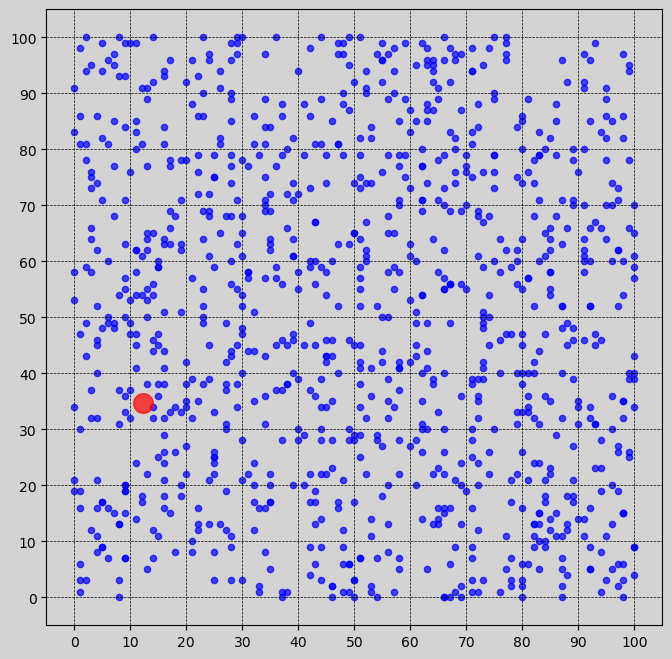

In [2]:
plot_points(x, y, dot_size=20, grid_size=15, highlight=[(12.2, 34.7)])


In [74]:
def get_cell_coordinates(pt, cell_size=10):
    # Calculate the cell coordinates
    cell_x = int(pt[0] // cell_size)
    cell_y = int(pt[1] // cell_size)
    return cell_x, cell_y

In [11]:
print(get_cell_coordinates((12.2, 34.7)))

(1, 3)


In [55]:
X = np.array([1,2,3,4,5])
X/2

array([0.5, 1. , 1.5, 2. , 2.5])

In [56]:
a_s = np.array([(1,2), (2,2)])
b = np.array((4,0))
np.dot(a_s, b)

array([4, 8])

In [ ]:
np.dot(, [0,4])

In [65]:
def vector_projection_length(vector, points):
    dot_product = np.dot(points, vector)
    vector_magnitude = np.linalg.norm(vector)
    projection_length = np.floor(dot_product / vector_magnitude**2)
    
    return projection_length

In [66]:
vector = np.array([10, 0])
point = np.array([10.2, 34.7])
print(vector_projection_length(vector, point))

1.0


In [67]:
vector = np.array([0, 10])
point = np.array([10.2, 34.7])
print(vector_projection_length(vector, point))

3.0


In [ ]:
my_points = np.array(list(zip(x,y)))

my_points[0:10]

In [77]:
vector_x_axis = np.array([10, 0])
vector_y_axis = np.array([0, 10])
cell_x = vector_projection_length(vector_x_axis, my_points[2])
cell_y = vector_projection_length(vector_y_axis, my_points[2])
print(cell_x, cell_y)

8.4 0.8


In [ ]:
plot_points(x, y, dot_size=20, grid_size=15, highlight=[my_points[2]])

In [ ]:
all_x_cells = vector_projection_length(vector_x_axis, my_points)
all_x_cells[0:10]

In [ ]:
all_y_cells = vector_projection_length(vector_y_axis, np.array(my_points))
all_y_cells[0:10]

In [ ]:
all_x_y_cells = list(zip(all_x_cells, all_y_cells))
all_x_y_cells[0:10]

In [71]:
# x = np.random.randint(0, 101, 20_000_000)
# y = np.random.randint(0, 101, 20_000_000)
# my_points = np.array(list(zip(x,y)))
len(my_points)

20000000

In [72]:
my_points[0:10]

array([[37, 17],
       [82,  3],
       [84,  8],
       [89, 95],
       [58, 42],
       [30, 31],
       [33, 38],
       [66, 55],
       [ 4, 75],
       [37, 26]])

In [75]:
%%time
all_x_y_cells_method_1 = []
for point in my_points:
    cell_coords = get_cell_coordinates(point)
    all_x_y_cells_method_1.append(cell_coords)
all_x_y_cells_method_1[0:5]

CPU times: user 8.42 s, sys: 131 ms, total: 8.55 s
Wall time: 8.57 s


[(3, 1), (8, 0), (8, 0), (8, 9), (5, 4)]

In [82]:
%%time
all_x_cells = vector_projection_length(vector_x_axis, my_points)
all_y_cells = vector_projection_length(vector_y_axis, my_points)
all_x_y_cells_method_2 = list(zip(all_x_cells, all_y_cells))
all_x_y_cells_method_2[0:5]

CPU times: user 1.49 s, sys: 260 ms, total: 1.75 s
Wall time: 1.76 s


[(3.0, 1.0), (8.0, 0.0), (8.0, 0.0), (8.0, 9.0), (5.0, 4.0)]

In [83]:
### Write code to compute the number of point in each cell
from collections import Counter
Counter(all_x_y_cells_method_2)


Counter({(3.0, 1.0): 196259,
         (8.0, 0.0): 196829,
         (8.0, 9.0): 195600,
         (5.0, 4.0): 196706,
         (3.0, 3.0): 195975,
         (6.0, 5.0): 196443,
         (0.0, 7.0): 196379,
         (3.0, 2.0): 195883,
         (4.0, 3.0): 196637,
         (7.0, 0.0): 196251,
         (8.0, 3.0): 195786,
         (7.0, 1.0): 196661,
         (5.0, 6.0): 196722,
         (4.0, 1.0): 195909,
         (4.0, 4.0): 196678,
         (5.0, 3.0): 195493,
         (1.0, 7.0): 196030,
         (3.0, 9.0): 195875,
         (4.0, 5.0): 196374,
         (4.0, 10.0): 19691,
         (5.0, 2.0): 196220,
         (0.0, 1.0): 195839,
         (7.0, 3.0): 195864,
         (5.0, 0.0): 196145,
         (6.0, 7.0): 196145,
         (5.0, 8.0): 196523,
         (9.0, 2.0): 195098,
         (0.0, 8.0): 195623,
         (5.0, 5.0): 196015,
         (9.0, 10.0): 19640,
         (0.0, 0.0): 195807,
         (6.0, 4.0): 196196,
         (7.0, 5.0): 195799,
         (0.0, 3.0): 195559,
         (2.0,

In [79]:
all_x_y_cells_method_2

[(3.7, 1.7),
 (8.2, 0.3),
 (8.4, 0.8),
 (8.9, 9.5),
 (5.8, 4.2),
 (3.0, 3.1),
 (3.3, 3.8),
 (6.6, 5.5),
 (0.4, 7.5),
 (3.7, 2.6),
 (4.1, 3.2),
 (7.6, 0.2),
 (8.1, 3.9),
 (7.3, 1.3),
 (5.0, 6.9),
 (4.9, 1.1),
 (4.9, 4.9),
 (5.6, 3.4),
 (5.0, 4.3),
 (1.6, 7.1),
 (3.7, 9.7),
 (4.5, 5.0),
 (4.3, 1.5),
 (4.8, 10.0),
 (5.2, 2.2),
 (3.0, 1.5),
 (0.7, 1.3),
 (7.7, 3.6),
 (5.2, 0.7),
 (7.3, 0.8),
 (4.0, 4.6),
 (6.6, 7.2),
 (5.6, 8.9),
 (7.1, 3.8),
 (9.3, 2.6),
 (0.3, 8.2),
 (5.3, 5.4),
 (9.0, 10.0),
 (8.2, 0.3),
 (0.4, 0.5),
 (6.2, 4.8),
 (3.6, 1.4),
 (7.2, 5.3),
 (0.9, 0.5),
 (0.3, 3.1),
 (2.8, 5.2),
 (0.2, 0.7),
 (6.9, 9.0),
 (4.4, 8.5),
 (5.8, 2.4),
 (0.6, 5.8),
 (4.2, 1.6),
 (9.3, 4.1),
 (9.9, 9.6),
 (4.5, 1.3),
 (1.8, 9.3),
 (7.4, 7.8),
 (9.2, 5.2),
 (7.8, 7.9),
 (7.0, 5.3),
 (3.7, 8.6),
 (3.1, 3.9),
 (1.3, 2.8),
 (9.3, 0.2),
 (0.2, 0.8),
 (5.4, 3.3),
 (4.0, 7.9),
 (7.4, 7.6),
 (1.9, 0.1),
 (7.0, 0.2),
 (2.1, 7.0),
 (7.6, 7.5),
 (1.2, 9.5),
 (1.6, 2.3),
 (9.8, 4.4),
 (1.7, 4.5),
 (6.2, 10.

Write a function that takes a vector $ \mathbf{v} \in \mathbb{R}^2 $, draws the vector starting from the origin $ \mathbf{0} $, and plots the line that spans the vector $ \mathbf{v} $.
  * A vector with its tail at the origin $ \mathbf{0} $ and its head at the point $\mathbf{v} \in \mathbb{R}^2 $



In [62]:
import numpy as np
import matplotlib.pyplot as plt

def draw_vector_and_line(vectors, points=None):
    """
    Takes a list of 2D vectors and plots each vector starting from the origin (0, 0),
    along with the line that spans the vector.
    
    Args:
    vectors (list of np.ndarray): A list of 2D vectors to draw.
    """
    plt.figure()
    ax = plt.gca()

    # Loop over each vector
    for v in vectors:
        # Plot the vector from origin (0,0)
        ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='b', label=f'Vector {v}')
        
        # Plot the line that spans the vector
        line_x = np.array([-10, 10])  # Extend the line over an arbitrary range
        slope = v[1] / v[0] if v[0] != 0 else np.inf
        if slope != np.inf:
            line_y = slope * line_x
            plt.plot(line_x, line_y, 'r--')
        else:
            plt.axvline(x=v[0], color='r', linestyle='--')
    if points is not None:
        for pt in points:
            plt.scatter(pt[0], pt[1])
    
    # Set the limits and grid for visualization
    ax.set_xlim([-3, 25])
    ax.set_ylim([-2, 40])
#     ax.axhline(0, color='black',linewidth=0.5)
#     ax.axvline(0, color='black',linewidth=0.5)
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title('Vectors and Spanning Lines')
    plt.show()



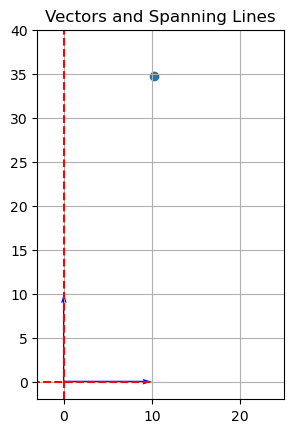

In [63]:
draw_vector_and_line(
    [np.array([10, 0]),np.array([0, 10])],
    points=[(10.2, 34.7)]
) 



$\frac{a \cdot b}{||b||^2}$

In [46]:
a  = (200, 16)
b = (0, 4)
np.floor(np.dot(a,b) / (np.sqrt(4**2 + 0**2))**2)


4.0

In [10]:
import numpy as np

def perpendicular_vector(p):
    return np.array([-p[1], p[0]])

p = np.array([3, 2])
perp_p = perpendicular_vector(p)
perp_p


array([-2,  3])

In [81]:
import numpy as np

def vector_projection_length(vector, points):
    dot_product = np.dot(points, vector)
    vector_magnitude = np.linalg.norm(vector)
    projection_length = np.floor(dot_product / vector_magnitude**2)
    return projection_length

# Example vectors
vector = np.array([3, 4])  # This has a magnitude of 5 (3-4-5 triangle)
point = np.array([6, 8])   # This is in the same direction as 'vector'

# Compute projection
proj_length = vector_projection_length(vector, point)
proj_length

2.0

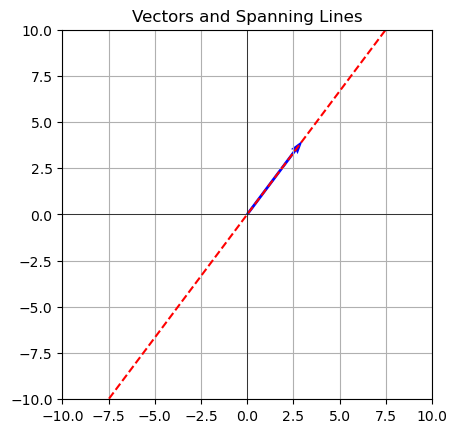

In [19]:
draw_vector_and_line([np.array(vector)], point=point
                    )


In [52]:
np.dot((6,0), (4,0))

24

In [45]:
np.sqrt((4**2) + (0**2))

4.0

In [51]:
np.dot((6,0), (4,0))/ np.sqrt(4**2 + 0**2)

6.0

In [29]:
np.dot((4,0), (4,0))/ np.sqrt(2**2 + 0**2)

8.0